# Reading CTB Mythen data with Python

This is a first example on how data can be read in Python using. We will need to add more configuration options later.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sls_detector_tools.plot import imshow
from sls_detector_tools.ctb_io import read_my302_file

## Read threshold scan into numpy array

In [15]:
start = 600
stop = 1800
threshold = np.arange(start, stop, 1)

nrow = stop-start
ncol = 64*3
data = np.zeros((nrow, ncol))

for i, th in enumerate(threshold):
    header, data[i] = read_my302_file(f'/home/l_frojdh/mythendata/MoKbZr_30kV60mA_1s_200V_thr{th}_1.raw',
                               bit_nr0 = 17,
                               bit_nr1 = 6, 
                               offset = -48)



## Plot data

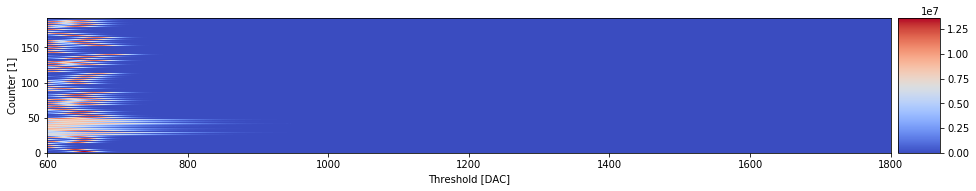

In [16]:
ax, im = imshow(np.rot90(data), kwargs = {'extent': (start,stop,0,ncol)})
ax.set_xlabel('Threshold [DAC]')
ax.set_ylabel('Counter [1]');



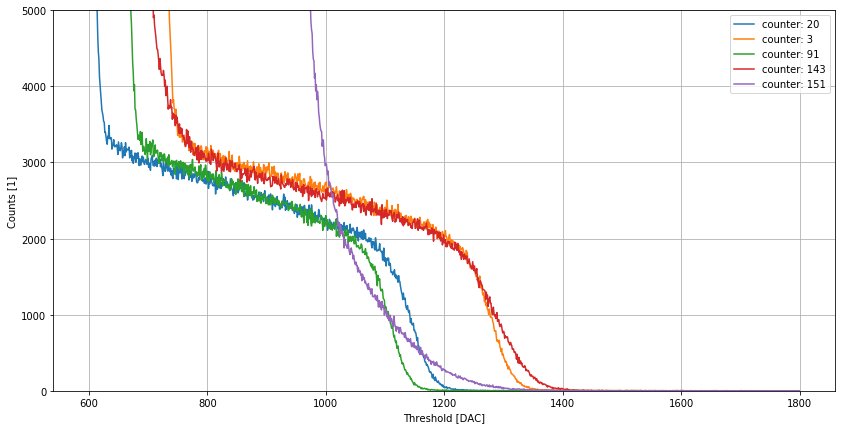

In [19]:
fig, ax = plt.subplots(1,1, figsize=(14,7))
for counter in np.random.randint(0,192,5):
    ax.plot(threshold, data[:, counter], label = f'counter: {counter}')
ax.set_ylim(0,5000)
ax.set_xlabel('Threshold [DAC]')
ax.set_ylabel('Counts [1]')
ax.legend()
ax.grid()